In [37]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D,UpSampling2D
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


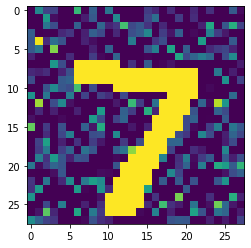

In [39]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[0].reshape(28, 28))

In [40]:
x_train_noisy[0]

array([[2.39853681e-03, 0.00000000e+00, 4.71039728e-01, 0.00000000e+00,
        0.00000000e+00, 4.36846864e-01, 7.62356490e-02, 0.00000000e+00,
        1.37384034e-02, 0.00000000e+00, 2.82350463e-01, 2.64058876e-01,
        2.19618617e-02, 1.24154817e-02, 0.00000000e+00, 4.74822235e-01,
        3.70036277e-01, 6.82972106e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.78277221e-01, 0.00000000e+00,
        0.00000000e+00, 1.14330578e-01, 7.85901687e-01, 0.00000000e+00],
       [0.00000000e+00, 2.31924514e-01, 0.00000000e+00, 0.00000000e+00,
        9.33879311e-02, 2.99945167e-01, 1.59294846e-01, 0.00000000e+00,
        2.13571776e-01, 0.00000000e+00, 1.66024645e-01, 0.00000000e+00,
        3.38389585e-01, 2.43566034e-01, 8.31451657e-02, 4.99430016e-02,
        7.08818596e-02, 1.65944596e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.60552143e-01, 3.33194219e-01, 3.08498563e-01,
        3.00870886e-01, 7.68168532e-01, 0.00000000e+00, 0.00000

In [4]:
input_img = Input(shape=(28, 28, 1))

nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
235/235 [==============================] - 96s 406ms/step - loss: -3.3402 - val_loss: -4.7021
Epoch 2/50
198/235 [========================>.....] - ETA: 13s - loss: -6.9586

In [ ]:
autoencoder.save("autoencoder.h5")

In [5]:
model = load_model("autoencoder.h5")

In [6]:
generated_image = model.predict(x_train_noisy)

In [22]:
def compare_images(noisy, generated):
    fig = plt.figure(figsize=(17,3))
    indexes = np.random.choice(len(noisy), size=10)
    for i in range(1,11):
        fig.add_subplot(1,10,i)
        plt.imshow(noisy[indexes[i-1]])
    fig = plt.figure(figsize=(17,3))
    for i in range(1,11):
        fig.add_subplot(2,10,i)
        plt.imshow(generated[indexes[i-1]])
    
    
    

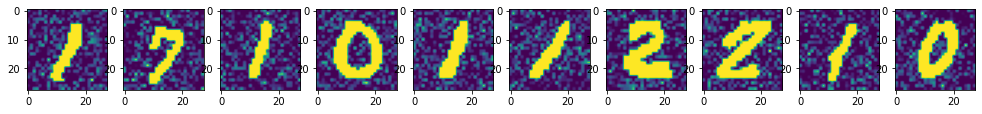

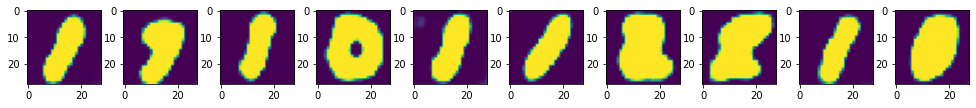

In [36]:
compare_images(x_train_noisy,generated_image)